# Multi-fluid modeling of a sheath in an isothermal weakly-ionized collisionless plasma

In [1]:
#%%python3

import numpy as np
import matplotlib.pyplot as plt
import glob

from PythonTools import plotResults
import scipy.constants as cst



plt.style.use('classic')
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.weight"] = 'normal'
plt.rcParams['figure.facecolor'] = 'white'



ModuleNotFoundError: No module named 'PythonTools.EEDF_Tools'

We present the solutions of a weakly-ionized collisionless plasma between two floating plates. The set of equations that are solved are as follow

$$\partial_t n_e + \partial_x \left( n_e u_e \right) = n_e \text{Da} $$
$$\partial_t n_i + \partial_x \left( n_i u_i \right) = n_e \text{Da} $$
$$\partial_t \left(n_eu_e\right) + \partial_x \left( n_e (u_e^2 + \epsilon^{-1})\right) = \frac{n_e}{\epsilon}\partial_x\phi - \nu_e n_e u_e $$
$$\partial_t \left(n_iu_i\right) + \partial_x \left( n_i (u_i^2 + \kappa)\right) = -n_i\partial_x\phi - \nu_i n_i u_i $$
$$\lambda^2\partial^2_{xx}\phi = n_e - n_i $$

The numerical scheme features:

 - TVD second order reconstruction
 - Different limiters
 - Different possible time integrations
 - Different numerical schemes
 - Thomas algorithm

The simulation allows for choosing for the following degrees of freedom

 - $\epsilon$
 - $\kappa$
 - $\nu_e$
 - $\nu_i$
 - $\lambda_D/L$

The ionization is not a proper degree of freedom as it is an eigenvalue of the system to find a steady solution. We compute the ionization as a function of the ion wall flux every time step, as follows

$$\text{Da} = \frac{2\left|\Gamma_{i_w}\right|}{<n_e>L}$$

where the average density is computed as $$<n_e>L = \int_0^L n_e dx$$

Press Shift+enter to read results

In [ ]:
import sys  
import os
import numpy as np

def getResults(filename):
    results = []
    with open(filename, 'r') as data:
        j = 0                   # counter of the lines of the file
        for line in data:
            p = line.split()
            results.append(np.array(p))


    # Transpose and change data type
    results = np.array(results)
    resultsTP = np.transpose(results)
    resultsTP   = resultsTP.astype(np.float64)      

    plotData = plotResults.Data(resultsTP)
    # Initializing without the results to choose it directly by hand
    #plotData2 = plotResults.Data()

    print("NbEqs = ", plotData.nbEqs)
    print("NbCells = ",plotData.nbCells)
    return plotData

folder = "./test_Sheath/"

txt_files = glob.glob(os.path.join(folder, "*.txt"))
if txt_files:
    filename = max(txt_files, key=os.path.getmtime)
    print("Latest file:", filename)
else:
    print("No txt files found.")
    
Data_Fluid = getResults(filename)

Latest file: ../Results/Sheat_3rdO_results_300Debye/file_iter_980000_time_2.33015990e+01.txt
NbEqs =  5
NbCells =  30000


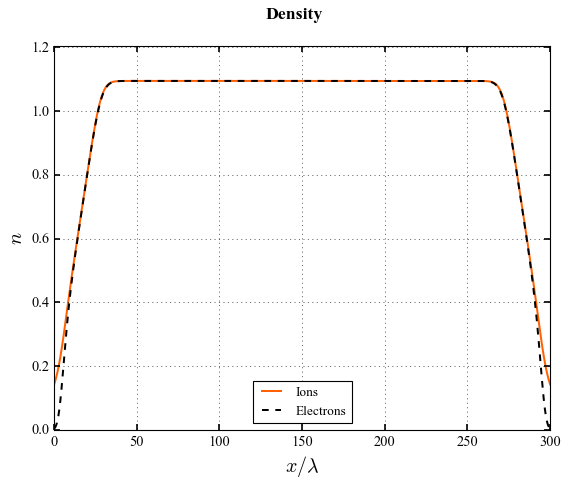

In [ ]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

f, ax = plt.subplots(1)

x   = Data_Fluid.resultsArray[0]
n_e = Data_Fluid.resultsArray[1]
n_i = Data_Fluid.resultsArray[3]


ax.plot(x, n_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Ions')
ax.plot(x, n_e, linestyle='--', color='k', linewidth=1.8, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$n$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)


f.suptitle('Density', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(n_e)
ymax = max(n_e)
ax.set_ylim([0., 1.1*ymax])
ax.grid(True)
plt.show()


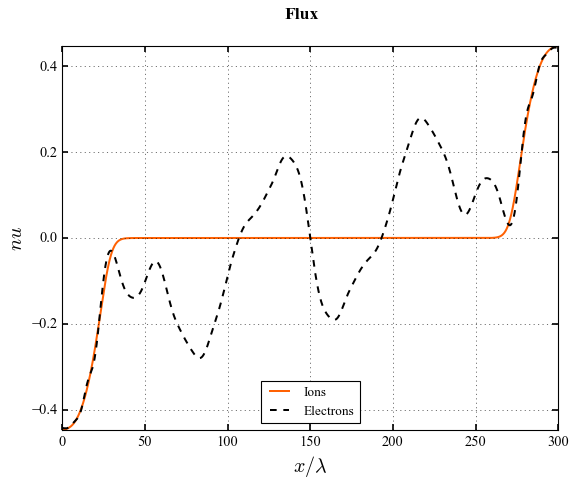

In [ ]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = Data_Fluid.resultsArray[0]
nU_e = Data_Fluid.resultsArray[2]
nU_i = Data_Fluid.resultsArray[4]

ax.plot(x, nU_i, color=(255/255,97/255,3/255), linewidth=1.8, markersize=3, label ='Ions')
ax.plot(x, nU_e, linestyle='--', color='k', linewidth=1.8, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$nu$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Flux', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(nU_i)
ymax = max(nU_i)
ax.set_ylim([ymin,ymax])
ax.grid(True)
plt.show()



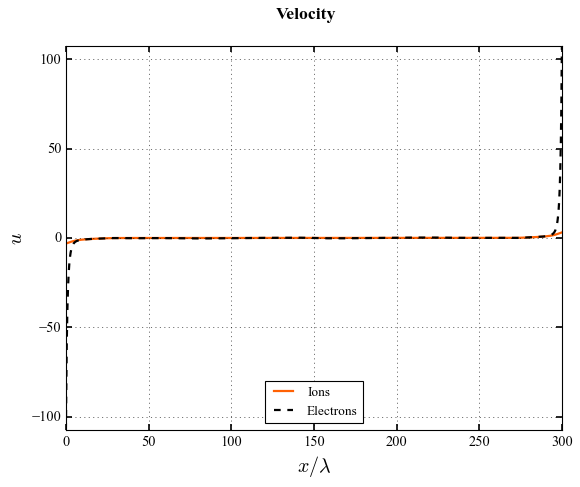

In [ ]:
import matplotlib
import matplotlib.pyplot as plt         ## plots

plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = Data_Fluid.resultsArray[0]
U_e = nU_e[:]/n_e[:]
U_i = nU_i[:]/n_i[:]

ax.plot(x, U_i, color=(255/255,97/255,3/255), linewidth=2, markersize=3, label ='Ions')
ax.plot(x, U_e, linestyle='--', color='k', linewidth=2, markersize=3, label ='Electrons')
ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$u$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Velocity', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

ymin = min(U_e)
ymax = max(U_e)
ax.set_ylim([ymin,ymax])
ax.grid(True)
plt.show()

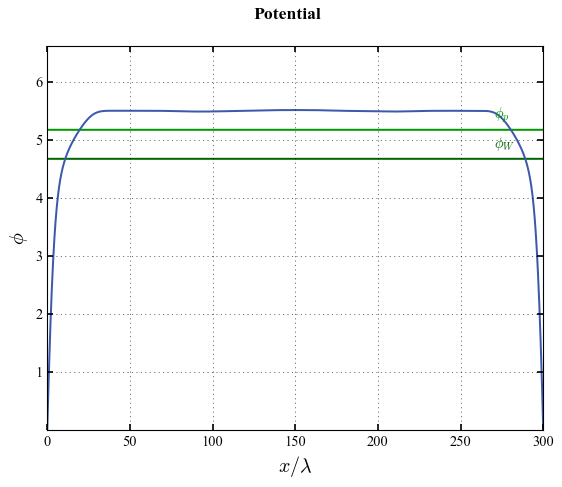

In [ ]:
plt.rcParams["font.family"] = 'Times New Roman'

f, ax = plt.subplots(1)

x   = Data_Fluid.resultsArray[0]
phi = Data_Fluid.resultsArray[5]

MASSRATIO = 0.73e5;
phi_W    = np.log((MASSRATIO/(2*np.pi))**(1/2))*np.ones(x.size);
phi_P    = (phi_W + 0.5)*np.ones(x.size);

ax.plot(x, phi_W, color=(0, 0.4, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi_P, color=(0, 0.6, 0), linewidth=1.8, markersize=3)
ax.plot(x, phi, color=(61/255,89/255,171/255), linewidth=1.8, markersize=3, label ='Potential')

ax.set_xlabel(r'$x/\lambda$', fontsize=18, weight = 'bold')
ax.set_ylabel(r'$\phi$', fontsize=18)
ax.xaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
ax.yaxis.set_tick_params(which='both', size=5, width=1.5, labelsize=13)
#plt.legend(loc = 'lower center', fontsize = 12)

f.suptitle('Potential', fontname = 'Times New Roman',fontsize=16, weight = 'bold')

plt.text(0.9*max(x),1.04*max(phi_W),r'$\phi_W$',fontsize=13,color=(0, 0.4, 0), weight = 'bold')
plt.text(0.9*max(x),1.04*max(phi_P),r'$\phi_p$',fontsize=13,color=(0, 0.6, 0), weight = 'bold')

ymin = min(phi)
ymax = max(phi)
ax.set_ylim([ymin,1.2*ymax])
ax.grid(True)
plt.show()




In [8]:
from PythonTools import makeVideosTwoFluid

makeVideosTwoFluid.make_videos(folder, MASSRATIO, saverate=10, frame_rate=20)

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with clang version 16.0.6
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1705436837242/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=x86_64-apple-darwin13.4.0-clang --cxx=x86_64-apple-darwin13.4.0-clang++ --nm=x86_64-apple-darwin13.4.0-nm --ar=x86_64-apple-darwin13.4.0-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --disable-videotoolbox --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-vers

{'density': '../regressionTests/test_Sheath/density.mp4',
 'flux': '../regressionTests/test_Sheath/flux.mp4',
 'velocity': '../regressionTests/test_Sheath/velocity.mp4',
 'potential': '../regressionTests/test_Sheath/potential.mp4'}